In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()   

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.drop(columns=['Gender'], inplace=True)

In [5]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [6]:
df['Height'] = df['Height'].astype(int)
df['Weight'] = df['Weight'].astype(int)
df.rename(columns={'Height': 'weight', 'Weight': 'height'}, inplace=True)

In [7]:
df.head()

,weight,height
0,73,241
1,68,162
2,74,212
3,71,220
4,69,206


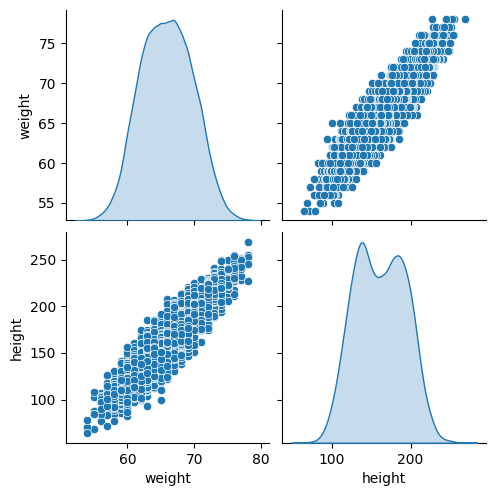

In [8]:
sns.pairplot(df, diag_kind='kde')

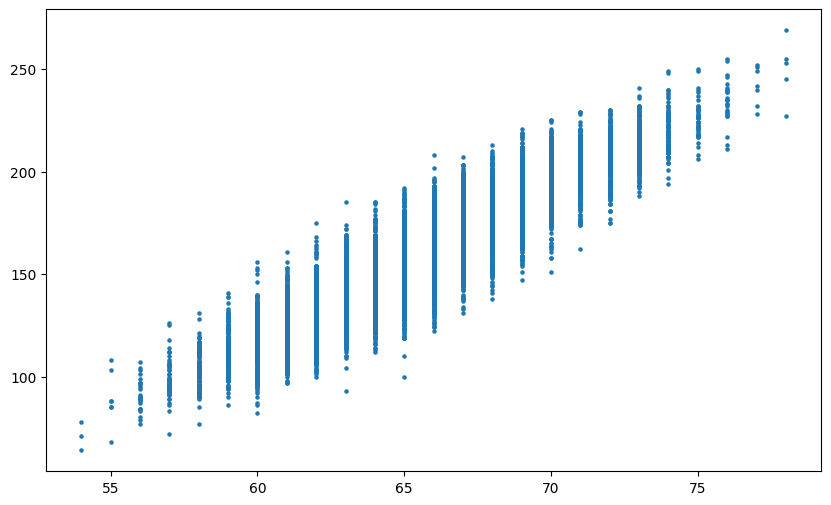

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['height'],s=5)

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[~outliers]
df.shape

weight     6.0
height    52.0
dtype: float64


(9999, 2)

<Axes: xlabel='weight', ylabel='height'>

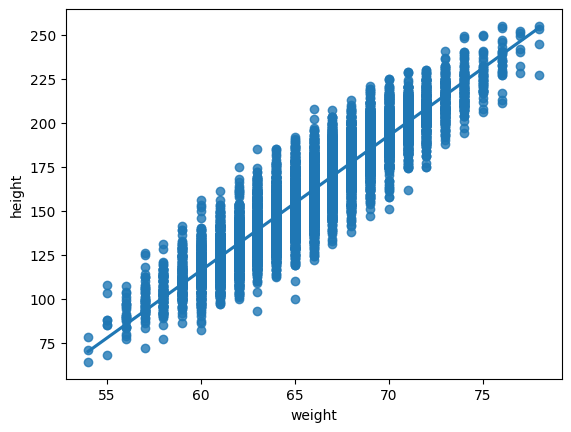

In [11]:
sns.regplot(x='weight', y='height', data=df)

In [12]:
X = df['weight']
y = df['height']
X = np.array(X).reshape(-1, 1)

In [13]:
X.shape, y.shape

((9999, 1), (9999,))

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
acc = model.score(X_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2*100:.2f} %')
print(f'Mean Absolute Error: {mae}')
print(f'Accuracy: {acc*100} %')
(f'{1-(1-r2)*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)):.2f} %' )

Mean Squared Error: 151.23689384328495
R2 Score: 85.75 %
Mean Absolute Error: 9.885884576328108
Accuracy: 100.0 %


'0.86 %'

In [19]:
df.sample(5)

,weight,height
7445,65,138
1427,70,196
9743,66,142
7232,67,153
1387,68,177


In [20]:
model.predict(sc.transform([[70]]))

array([192.61442727])

In [21]:
model.coef_, model.intercept_

(array([29.38107257]), np.float64(160.71436191492202))

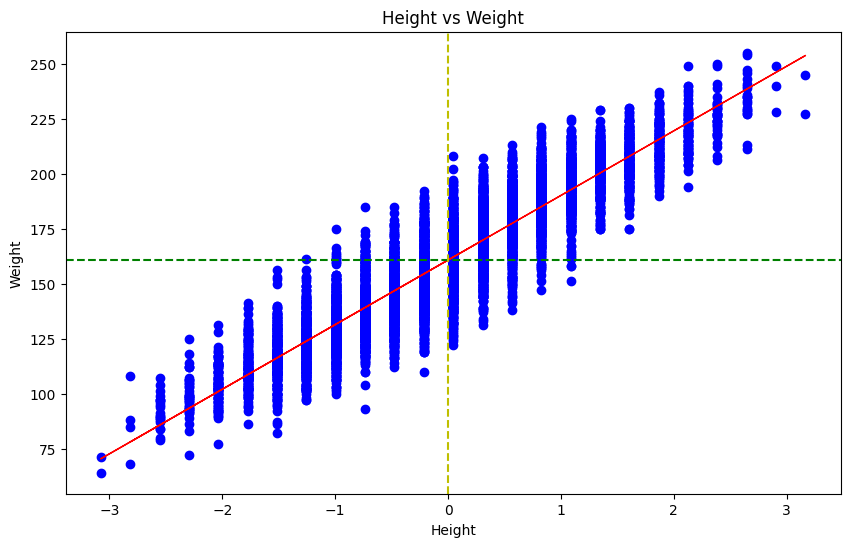

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_test, model.predict(X_test), color='red', linewidth=1)
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.axhline(y=model.intercept_, color='g', linestyle='--')
plt.axvline(x=0, color='y', linestyle='--')


In [29]:
print(model.predict(sc.transform([[70]])))

[192.61442727]


In [ ]:
### Assumptions of Linear Regression
# The assumptions of linear regression are as follows:
# 1. Linearity: The relationship between the independent and dependent variables
# should be linear.
# 2. residuals should be normally distributed.
# 3. Homoscedasticity: The variance of residuals should be constant across all levels
# of the independent variables.
# 4. No or little multicollinearity: The independent variables should not be correlated


In [30]:
residuals = y_test - y_pred

In [31]:
residuals

5345     9.990455
7445   -16.412800
1731     7.946875
8720    -6.053125
4522     4.385573
          ...    
5010   -11.333776
7054    -6.772475
5904    -2.491824
9871   -26.693451
73      -6.693451
Name: height, Length: 2500, dtype: float64

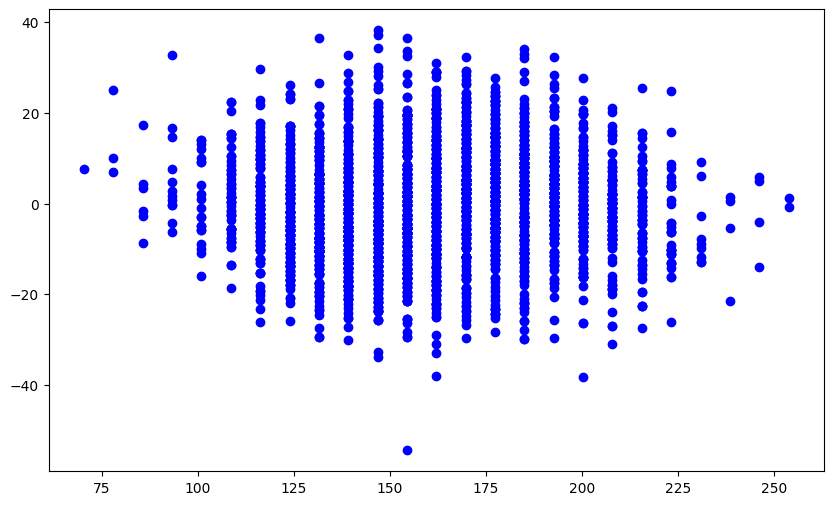

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')


/tmp/ipykernel_2066/412251726.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=10, kde=True)


Text(0.5, 1.0, 'Residuals')

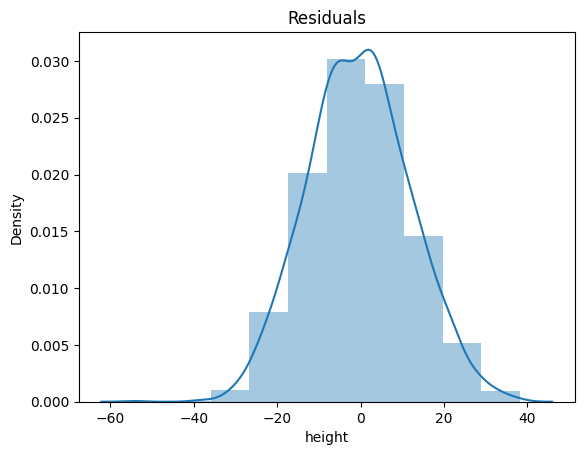

In [36]:
sns.distplot(residuals, bins=10, kde=True)
plt.title('Residuals')

In [39]:
## pickling model
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
# unpickling model
model = pickle.load(open('model.pkl', 'rb'))
model.predict(sc.transform([[70]]))

array([192.61442727])